In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def coin_payoff(n):
    outcome = np.random.binomial(n, 0.5)
    if outcome == 1:
        payoff = 0.5
    elif outcome == 0:
        payoff = 2
    return payoff

In [183]:
def payoff(cash_ret_list):
    
    payoff = pd.DataFrame(cash_ret_list).pct_change()
    payoff = payoff.fillna(0)
    payoff = (payoff+1).cumprod()
    payoff = payoff -1 
    
    return payoff
    

In [480]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

# Shannons Deamon Illustration with a coin and cash

TODO
- geo and arithemtic mean
- correlation

In [541]:
runs = 10000
outcome =pd.DataFrame(np.random.binomial(1, 0.5, size = runs))

In [542]:
outcome[outcome==1]=2
outcome[outcome==0] = 0.5
outcome.iloc[0] = 1

In [556]:
init_coin_cash = 1
cash_weight = 0.5
coin_weight = 1 - cash_weight
coin_cash_return = []
for i in range(runs):
    coin_cash_return.append(init_coin_cash)
    cash = float(init_coin_cash * cash_weight)
    coin = float(init_coin_cash * coin_weight)
    coin = float(coin * outcome.loc[i])
    init_coin_cash = coin + cash
    
cash = [1] * runs

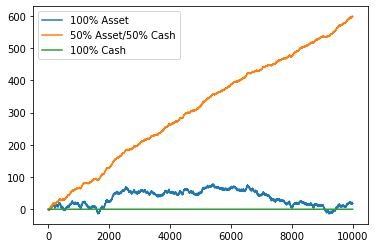

In [557]:
plt.plot(np.log(outcome.cumprod()), label = "100% Asset")
plt.plot(np.log(coin_cash_return), label = str(round(coin_weight*100))+"% Asset/"+ str(round(cash_weight*100))+"% Cash")
plt.plot(np.log(cash), label = "100% Cash")
plt.legend();